In [1]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

In [5]:
# df_train = pd.read_csv("processed_train_dataset.csv",low_memory = False)
# df_train.head(10)

In [6]:
# df_train.shape

In [7]:
# df = df_train.set_index('primary_identifier')
# df.head()

In [8]:
# #converting categorical values to numerical values
# df.loc[df['next_month_plan'] == 'PKG1', 'next_month_plan'] = 1
# df.loc[df['next_month_plan'] == 'PKG2', 'next_month_plan'] = 2
# df.loc[df['next_month_plan'] == 'PKG3', 'next_month_plan'] = 3
# df.loc[df['next_month_plan'] == 'PKG4', 'next_month_plan'] = 4
# df.loc[df['next_month_plan'] == 'PKG5', 'next_month_plan'] = 5
# df.loc[df['next_month_plan'] == 'PKG6', 'next_month_plan'] = 6
# df.loc[df['next_month_plan'] == 'PKG7', 'next_month_plan'] = 7
# df.loc[df['next_month_plan'] == 'PKG8', 'next_month_plan'] = 8
# df['district_name'] = pd.factorize(df['district_name'])[0]

In [9]:
# #removing all nan values
# df_train1 = df.dropna()
# df_train1.shape

In [10]:
# #removing all nan values
# df_train2 = df.drop(['add_on_tot_rental','add_on_count'], axis=1)
# df_train2 = df_train2.dropna()
# df_train2.shape

In [11]:
# #converting categorical values to numerical values
# df_train1['device_type'] = pd.factorize(df_train1['device_type'])[0];
# df_train1['device_category'] = pd.factorize(df_train1['device_category'])[0];
# df_train1['gender'] = pd.factorize(df_train1['gender'])[0];
# df_train1['age_group'] = pd.factorize(df_train1['age_group'])[0];

# df_train2['device_type'] = pd.factorize(df_train2['device_type'])[0];
# df_train2['device_category'] = pd.factorize(df_train2['device_category'])[0];
# df_train2['gender'] = pd.factorize(df_train2['gender'])[0];
# df_train2['age_group'] = pd.factorize(df_train2['age_group'])[0];


In [12]:
# df_train1.head()

In [13]:
# df_train2.head()

In [14]:
# df_train2.to_csv("train_data.csv")

# Train data

In [2]:
train_df = pd.read_csv("Train_Fix.csv",low_memory=False)
test_df = pd.read_csv("Validation_Fix.csv",low_memory=False)

In [3]:
train_df.head()

,primary_identifier,device_type,device_category,gender,district_name,age_group,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,...,vusage_onnet_stddev,vusage_offnet_sum,vusage_offnet_max,vusage_offnet_min,vusage_offnet_days,vusage_offnet_avg,vusage_offnet_stddev,number_of_fixed_bb_accounts,number_of_iptv_accounts,next_month_plan
0,4091048,0,0,1,5,0,154,822.94,6131.0,0.079320,...,0.000000,5.0,1.700000,0.0,8.0,0.625000,0.376370,0.0,0.0,1
1,8522790,0,0,0,10,1,71,917.70,5571.0,3.905389,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.0,1
2,8118617,1,5,0,3,0,17,464.44,33.0,1.059408,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.0,0.0,1
3,2817550,0,0,0,4,2,273,3103.37,322.0,0.358701,...,24.942477,182.0,26.766667,0.0,24.0,7.583333,6.980959,0.0,1.0,1
4,7105758,0,0,0,4,5,105,1059.65,1149.0,0.000000,...,0.000000,0.0,0.400000,0.0,1.0,0.000000,0.085280,0.0,0.0,1


In [4]:
train_df[train_df.columns].nunique()

primary_identifier             8783
device_type                       3
device_category                   6
gender                            2
district_name                    26
age_group                         7
network_stay                    285
average_monthly_bill_amount    8649
dusage_sum                     6891
dusage_min                     5806
dusage_max                     8076
dusage_avg                     7384
dusage_days                      31
dusage_stddev                  8075
vusage_onnet_sum                419
vusage_onnet_max               1213
vusage_onnet_min                  1
vusage_onnet_days                30
vusage_onnet_avg                555
vusage_onnet_stddev            1395
vusage_offnet_sum               567
vusage_offnet_max              2718
vusage_offnet_min                96
vusage_offnet_days               31
vusage_offnet_avg              2096
vusage_offnet_stddev           5942
number_of_fixed_bb_accounts       4
number_of_iptv_accounts     

In [16]:
df_class_instance = train_df.groupby(by=['next_month_plan'])['district_name'].count().sort_values(ascending=False).reset_index()
df_class_instance

,next_month_plan,district_name
0,1,3078
1,3,1440
2,5,1308
3,2,1140
4,4,616
5,6,611
6,7,297
7,8,293


In [17]:
train_df = train_df.set_index('primary_identifier')
train_df.head()

,device_type,device_category,gender,district_name,age_group,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,dusage_max,...,vusage_onnet_stddev,vusage_offnet_sum,vusage_offnet_max,vusage_offnet_min,vusage_offnet_days,vusage_offnet_avg,vusage_offnet_stddev,number_of_fixed_bb_accounts,number_of_iptv_accounts,next_month_plan
primary_identifier,,,,,,,,,,,,,,,,,,,,,
4091048,0,0,1,5,0,154,822.94,6131.0,0.079320,1529.399115,...,0.000000,5.0,1.700000,0.0,8.0,0.625000,0.376370,0.0,0.0,1
8522790,0,0,0,10,1,71,917.70,5571.0,3.905389,485.940130,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.0,1
8118617,1,5,0,3,0,17,464.44,33.0,1.059408,1.254282,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.0,0.0,1
2817550,0,0,0,4,2,273,3103.37,322.0,0.358701,69.185369,...,24.942477,182.0,26.766667,0.0,24.0,7.583333,6.980959,0.0,1.0,1
7105758,0,0,0,4,5,105,1059.65,1149.0,0.000000,314.132696,...,0.000000,0.0,0.400000,0.0,1.0,0.000000,0.085280,0.0,0.0,1


In [18]:
test_df = test_df.set_index('primary_identifier')
test_df.head()

,device_type,device_category,gender,district_name,age_group,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,dusage_max,...,vusage_onnet_stddev,vusage_offnet_sum,vusage_offnet_max,vusage_offnet_min,vusage_offnet_days,vusage_offnet_avg,vusage_offnet_stddev,number_of_fixed_bb_accounts,number_of_iptv_accounts,next_month_plan
primary_identifier,,,,,,,,,,,,,,,,,,,,,
1982763,0,0,0,2,1,138,3170.45,12629.0,38.566684,835.667984,...,31.370896,134.0,25.466667,0.0,25.0,5.360000,5.964719,0.0,0.0,1
9859465,0,0,0,6,0,105,1661.15,61777.0,832.538741,3540.417746,...,1.150217,167.0,86.083333,0.0,19.0,8.789474,16.374036,0.0,0.0,1
2548821,0,0,1,3,5,107,1264.11,436.0,0.176134,186.652790,...,0.000000,226.0,45.983333,0.0,22.0,10.272727,11.984922,0.0,0.0,1
8431169,0,0,0,3,2,216,1536.66,4690.0,0.000000,2350.902064,...,0.000000,248.0,33.733333,0.0,25.0,9.920000,9.162625,0.0,0.0,1
9906113,0,0,1,3,5,10,1066.70,623.0,0.092537,342.387612,...,0.000000,8.0,7.150000,0.0,2.0,4.000000,1.309273,0.0,0.0,1


In [19]:
# top 8 features
top_8_features = ['network_stay',
 'average_monthly_bill_amount',
 'dusage_sum',
 'dusage_max',
 'dusage_stddev',
 'vusage_offnet_max',
 'vusage_offnet_days',
 'vusage_offnet_stddev',
 'next_month_plan']

In [20]:
# top 15 features
top_15_features = ['network_stay',
 'average_monthly_bill_amount',
 'dusage_sum',
 'dusage_max',
 'dusage_min',
 'dusage_stddev',
 'vusage_offnet_max',
 'vusage_offnet_days',
 'vusage_offnet_stddev',
 'district_name',
 'age_group',
 'next_month_plan']

In [21]:
temp = train_df[top_8_features]
temp1 = test_df[top_8_features]

In [29]:
#defining train test data
x_train = temp[temp.columns[:-1]]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

y_train = temp[temp.columns[-1]]
y_train = y_train.astype('int')

x_test = temp1[temp1.columns[:-1]]
scaler1 = MinMaxScaler()
x_test = scaler1.fit_transform(x_test)

y_test = temp1[temp1.columns[-1]]
y_test = y_test.astype('int')


In [32]:
models=[
RandomForestClassifier(),
GradientBoostingClassifier()
]

model_names=['RandomForestClassifier','GradientBoostingClassifier']

acc=[]
eval_acc={}

for model in range(len(models)):
    classification_model=models[model]
    classification_model.fit(x_train,y_train)
    pred=classification_model.predict(x_test)
    #acc.append(accuracy_score(pred,y_test))
    acc.append(f1_score(pred, y_test, average='weighted'))

eval_acc={'Modelling Algorithm':model_names,'Accuracy':acc}
eval_acc

{'Modelling Algorithm': ['RandomForestClassifier',
  'GradientBoostingClassifier'],
 'Accuracy': [0.5317088959525168, 0.31678194026825196]}

In [33]:
acc_table=pd.DataFrame(eval_acc)
acc_table = acc_table.sort_values(by='Accuracy', ascending=[False])
acc_table

,Modelling Algorithm,Accuracy
0,RandomForestClassifier,0.531709
1,GradientBoostingClassifier,0.316782


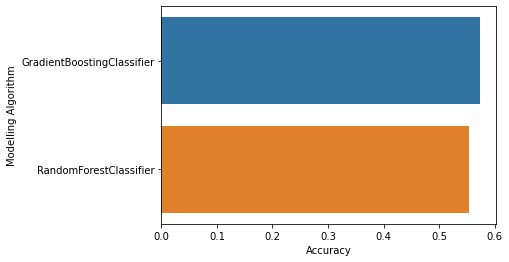

In [25]:
sns.barplot(y='Modelling Algorithm',x='Accuracy',data=acc_table);

In [37]:
# Import Support Vector Classifier
from sklearn.svm import SVC
#svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=100 ,learning_rate=0.5)

# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",f1_score(y_test, y_pred, average='weighted'))


Accuracy: 0.29363450097370175


In [27]:
# clf=RandomForestClassifier(n_estimators=100)

# #Train the model using the training sets y_pred=clf.predict(X_test)
# clf.fit(x_train,y_train)

# y_pred=clf.predict(x_test)
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [28]:
# def train_validate_test_split(df, train_percent=.75, validate_percent=.15, seed=None):
#     np.random.seed(seed)
#     perm = np.random.permutation(df.index)
#     m = len(df.index)
#     train_end = int(train_percent * m)
#     validate_end = int(validate_percent * m) + train_end
#     train = df.iloc[perm[:train_end]]
#     validate = df.iloc[perm[train_end:validate_end]]
#     test = df.iloc[perm[validate_end:]]
#     return train, validate, test